In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
### for Jupyter
trainpath = '/home/mekawy/Documents/SC/chemistry lab/dataset/train/'
testpath = '/home/mekawy/Documents/SC/chemistry lab/dataset/test/'
predpath = '/home/mekawy/Documents/SC/chemistry lab/dataset/pred/'

In [3]:
for folder in  os.listdir(trainpath + 'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 242 in folder zn
For training data , found 239 in folder cuso4
For training data , found 245 in folder 2hgo
For training data , found 226 in folder cuso4zn


In [4]:
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 62 in folder zn
For testing data , found 60 in folder cuso4
For testing data , found 62 in folder 2hgo
For testing data , found 60 in folder cuso4zn


In [5]:
files = gb.glob(pathname= str(predpath +'pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 40


In [6]:
code = {'2hgo':0 ,'cuso4':1,'cuso4zn':2,'zn':3}

def getcode(n):
    for x,y in code.items():
        if n ==y :
            return x

In [7]:
size = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(191, 256, 3)    30
(256, 253, 3)    21
(249, 256, 3)    18
(253, 256, 3)    17
(199, 256, 3)    17
(254, 256, 3)    17
(203, 256, 3)    16
(206, 256, 3)    15
(246, 256, 3)    15
(189, 256, 3)    15
(196, 256, 3)    15
(256, 256, 3)    14
(181, 256, 3)    13
(251, 256, 3)    13
(188, 256, 3)    12
(256, 251, 3)    12
(202, 256, 3)    12
(172, 256, 3)    11
(185, 256, 3)    11
(194, 256, 3)    11
(197, 256, 3)    11
(198, 256, 3)    11
(250, 256, 3)    11
(213, 256, 3)    11
(234, 256, 3)    11
(180, 256, 3)    11
(247, 256, 3)    11
(244, 256, 3)    10
(209, 256, 3)    10
(256, 255, 3)    10
                 ..
(148, 256, 3)     2
(143, 256, 3)     2
(222, 256, 3)     2
(256, 226, 3)     2
(130, 256, 3)     2
(140, 256, 3)     2
(256, 242, 3)     2
(168, 256, 3)     2
(256, 210, 3)     1
(256, 239, 3)     1
(126, 256, 3)     1
(108, 256, 3)     1
(145, 256, 3)     1
(149, 256, 3)     1
(135, 256, 3)     1
(160, 256, 3)     1
(256, 237, 3)     1
(106, 256, 3)     1
(256, 225, 3)     1


In [8]:
s1 = 100
s2 = 100

In [9]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s1,s2))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [10]:
print(f'we have {len(X_train)} items in X_train')

we have 952 items in X_train


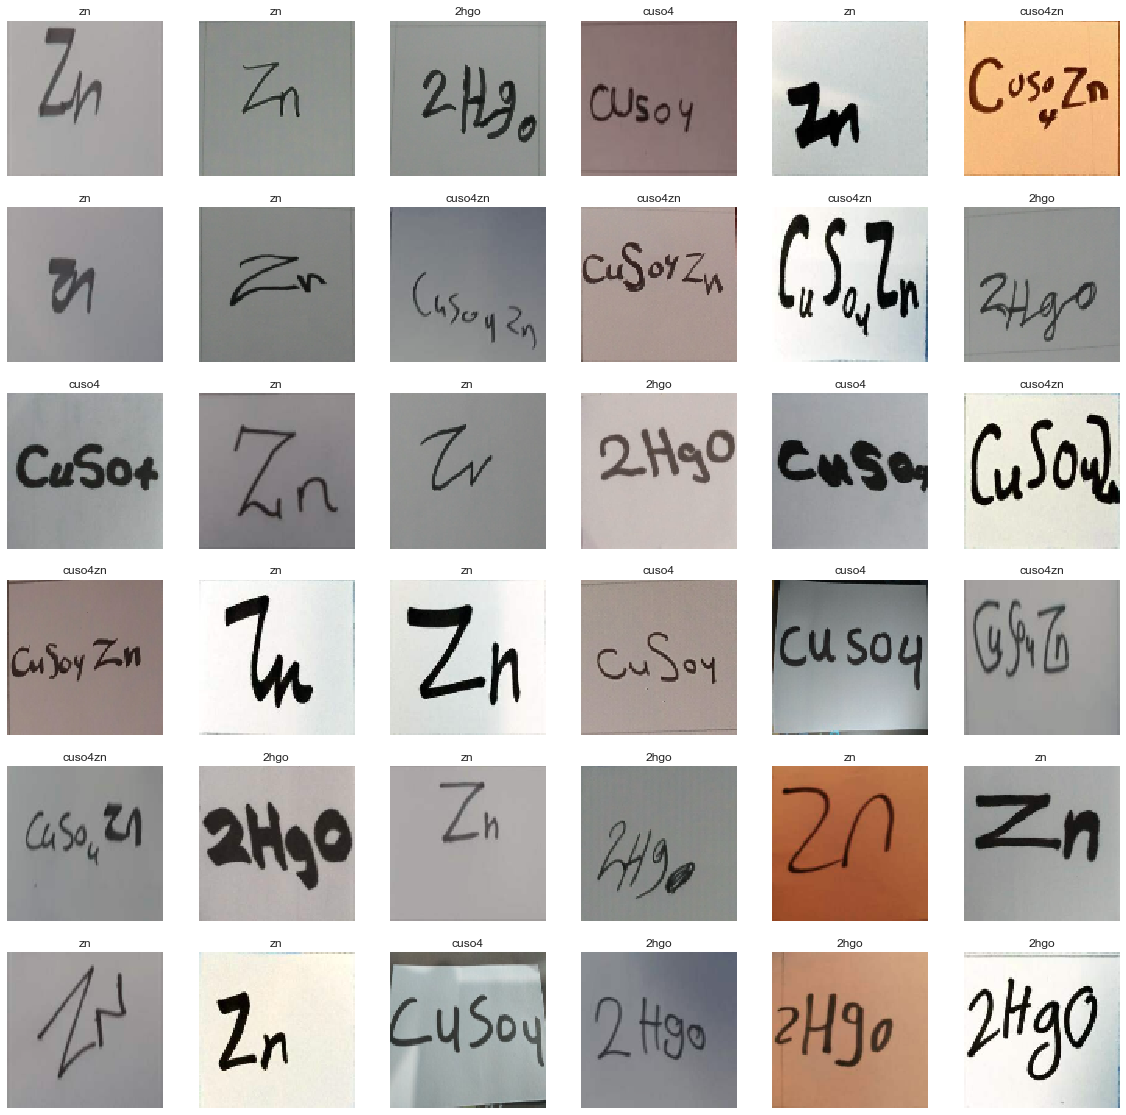

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [12]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str(testpath + 'test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s1,s2))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [13]:
print(f'we have {len(X_test)} items in X_test')

we have 244 items in X_test


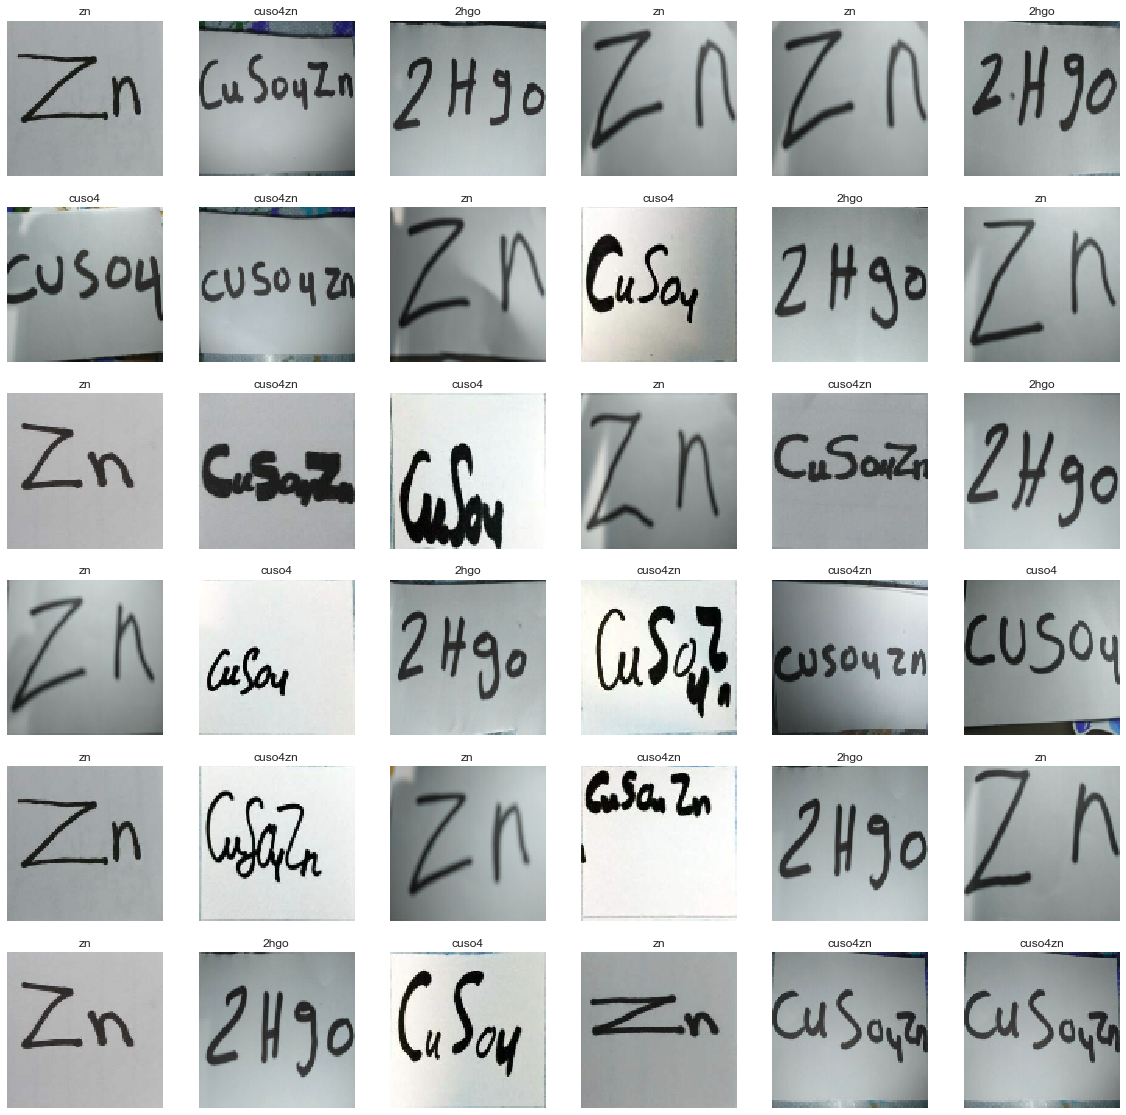

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [15]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s1,s2))
    X_pred.append(list(image_array))       

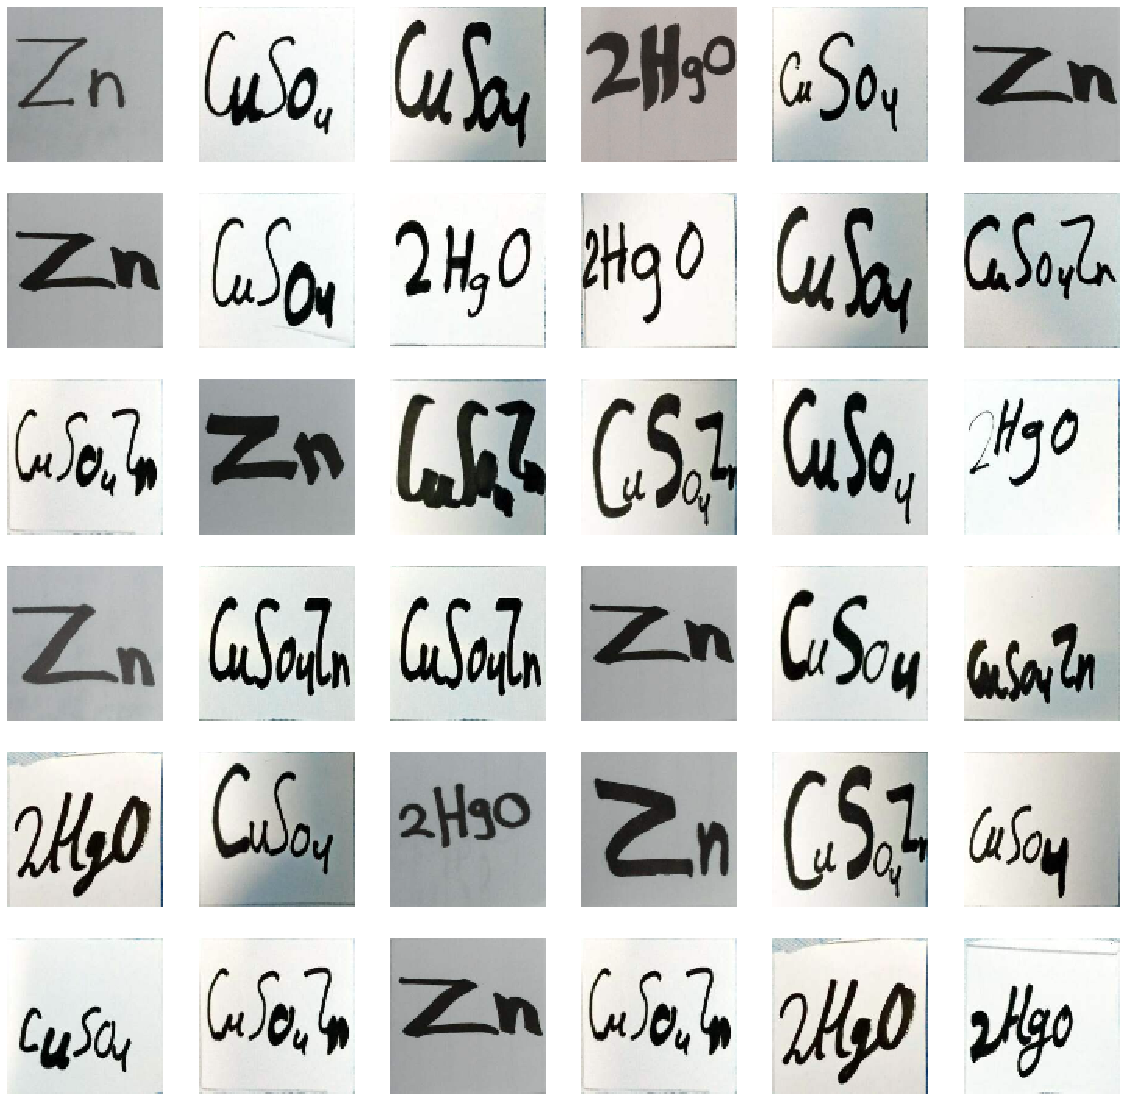

In [16]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (952, 100, 100, 3)
X_test shape  is (244, 100, 100, 3)
X_pred shape  is (40, 100, 100, 3)
y_train shape  is (952,)
y_test shape  is (244,)


In [18]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s1,s2,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(4,activation='softmax') ,    
        ])

In [19]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (Non

In [21]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)


Epoch 1/50
952/952 [==============================] - 174s 183ms/step - loss: 3.0540 - accuracy: 0.2321
Epoch 2/50
952/952 [==============================] - 172s 181ms/step - loss: 1.4065 - accuracy: 0.2206
Epoch 3/50
952/952 [==============================] - 172s 181ms/step - loss: 1.3864 - accuracy: 0.2647
Epoch 4/50
952/952 [==============================] - 172s 180ms/step - loss: 1.3747 - accuracy: 0.2731
Epoch 5/50
952/952 [==============================] - 172s 181ms/step - loss: 1.3488 - accuracy: 0.3204
Epoch 6/50
952/952 [==============================] - 172s 181ms/step - loss: 1.2543 - accuracy: 0.4170
Epoch 7/50
952/952 [==============================] - 172s 181ms/step - loss: 1.1962 - accuracy: 0.4874
Epoch 8/50
952/952 [==============================] - 172s 181ms/step - loss: 0.9438 - accuracy: 0.6082
Epoch 9/50
952/952 [==============================] - 172s 181ms/step - loss: 0.6979 - accuracy: 0.7090
Epoch 10/50
952/952 [==============================] - 172s 181

In [30]:
KerasModel.save('CCLabModel.h5')

In [27]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy*100 ),'%')

244/244 [==============================] - 13s 53ms/step
Test Loss is 1.8193901811466766
Test Accuracy is 87.7049207687378 %


In [24]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (244, 4)


In [25]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (40, 4)


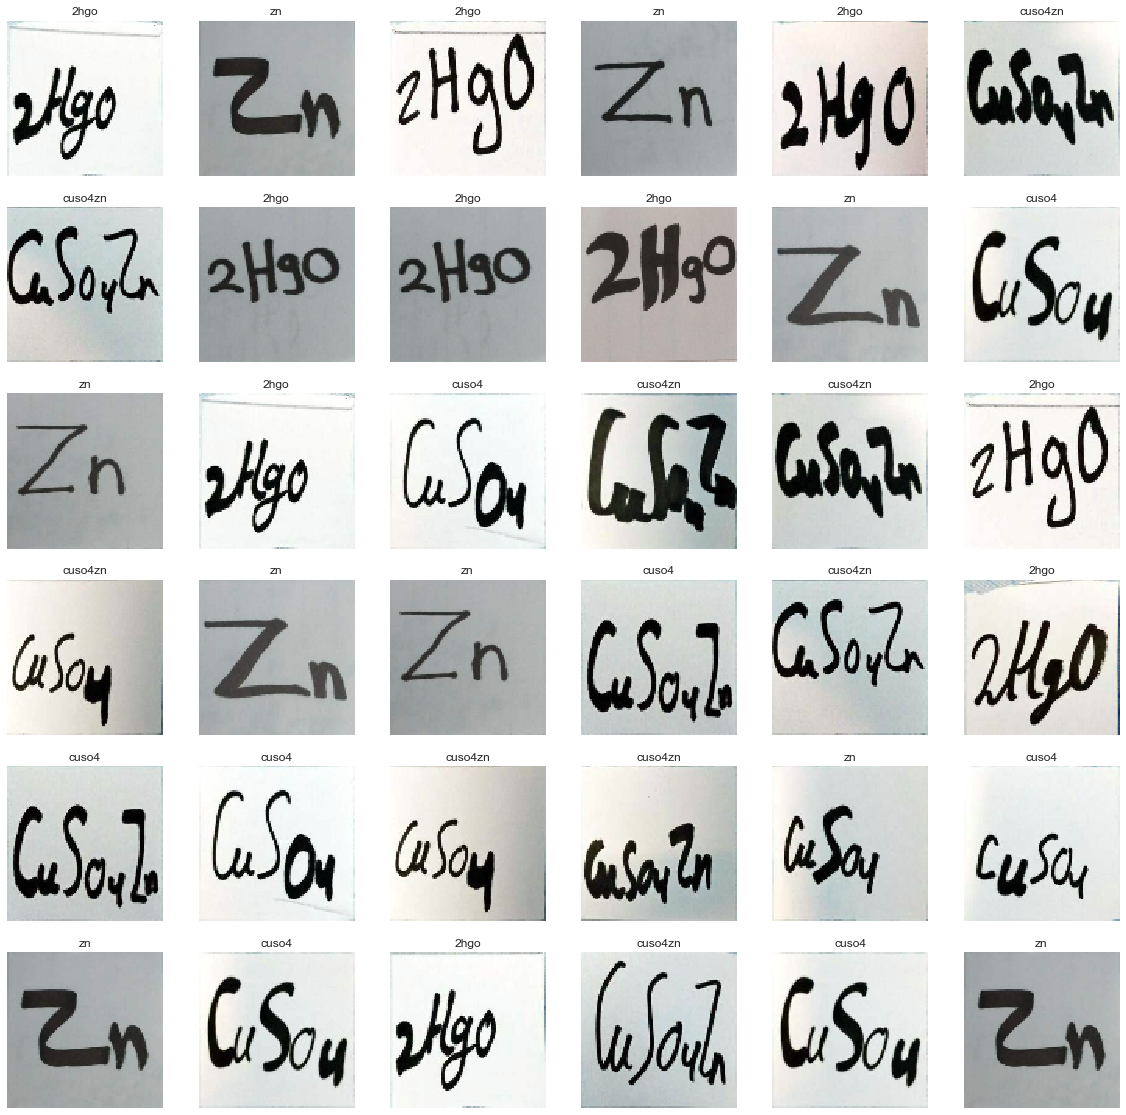

In [26]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

In [33]:
from keras.models import load_model
new =load_model('CCLabModel.h5')
print(new.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 50)         